<a href="https://colab.research.google.com/github/natalia-kurbakova/Baruch-Data-Challenge/blob/main/datachallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

train = pd.read_csv("train updated 04132022.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
train = pd.DataFrame(train)
train.columns

Index(['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'fail_7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_

In [5]:
train.isnull().sum()

deviceid                          0
avg_time_charging_lag1            0
avg_time_charging_lag2            0
avg_time_charging_lag3            0
avg_time_charging_lag7           66
charging_rate_lag3                0
charging_rate_lag7               12
avg_time_discharging_lag1         0
avg_time_discharging_lag2         0
avg_time_discharging_lag3         0
avg_time_discharging_lag7        66
discharging_rate_lag3             0
discharging_rate_lag7            12
fail_7                            0
charge_cycle_time_below_12        0
avg_time_charging_lag4            0
avg_time_discharging_lag4         0
avg_time_charging_lag5            7
avg_time_discharging_lag5         7
avg_time_charging_lag6           28
avg_time_discharging_lag6        28
avg_time_charging_lag8          162
avg_time_discharging_lag8       162
avg_time_charging_lag9          374
avg_time_discharging_lag9       374
avg_time_charging_lag10         797
avg_time_discharging_lag10      797
avg_time_charging_lag11     

In [6]:
train.describe()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
count,40500.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500.000000,40500.000000,40500.000000,40493.000000,40493.000000,40472.000000,40472.000000,40338.000000,40338.000000,40126.000000,40126.000000,39703.000000,39703.000000,38914.000000,38914.000000,37743.000000,37743.000000,36118.000000,36118.000000,33832.000000,33832.000000,40500.000000,40500.000000,40498.000000,40469.000000,40500.000000,40500.000000,40498.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000
mean,27511.156593,16.274839,16.521473,16.277490,16.355088,-0.043389,-0.053017,25.800928,26.353566,25.903624,26.081209,-0.094954,-0.114921,0.232123,16.343948,26.082150,16.334986,26.058893,16.344544,26.081712,16.388239,26.128528,16.315824,26.062368,16.364712,26.101246,16.579682,26.558981,16.555553,26.529755,16.410888,26.229872,16.498667,26.357605,-0.108077,-0.100143,-0.089712,-0.118265,-0.039316,-0.038808,-0.047330,84.978399,84.859009,25.258990,2.154864,351.421779,348.207773,16.352522,26.081939,4159.266095,20.526154,42.434462
std,12992.647611,15.374342,15.425769,15.305041,15.137390,0.776305,0.756558,29.243961,29.459305,29.269789,28.996887,1.270488,1.324977,0.422193,15.208344,29.158269,15.196900,29.139730,15.146648,29.057013,15.137835,28.941077,14.954684,28.713222,14.935286,28.616522,14.988169,28.810316,14.917026,28.637583,14.805712,28.365960,14.826322,28.323536,1.385724,1.373807,1.322062,1.375731,0.720808,0.787685,0.818219,15.466961,15.507518,37.037053,2.223237,12.745409,13.277782,3.553653,6.813312,11.306765,16.461988,10.321011
min,5000.000000,1.510000,1.060000,0.040000,1.070000,-76.946667,-42.130000,0.520000,0.700000,1.070000,1.740000,-22.413333,-18.606667,0.000000,2.960000,2.110000,0.860000,1.960000,1.420000,2.430000,1.420000,0.850000,2.790000,0.040000,2.410000,2.140000,2.050000,1.850000,2.880000,0.020000,2.240000,0.080000,1.760000,0.370000,-58.820000,-61.173333,-29.996667,-47.583333,-17.450000,-56.886667,-85.763333,14.666667,14.416667,0.000000,0.090909,304.050833,298.250000,4.890000,4.131111,4112.454545,1.000000,9.021111
25%,16234.750000,4.910000,4.920000,4.900000,4.900000,-0.066667,-0.100000,4.200000,4.210000,4.200000,4.200000,-0.183333,-0.233333,0.000000,4.910000,4.210000,4.910000,4.200000,4.900000,4.210000,4.890000,4.200000,4.900000,4.200000,4.890000,4.210000,4.900000,4.210000,4.910000,4.210000,4.910000,4.210000,4.910000,4.210000,-0.190000,-0.206667,-0.203333,-0.240000,-0.086667,-0.086667,-0.090000,74.647059,74.500000,3.565217,1.052632,342.770532,339.267541,13.912625,21.418250,4151.666667,11.333333,35.364068
50%,27528.000000,5.770000,5.830000,5.780000,5.780000,0.000000,-0.003333,5.860000,5.920000,5.850000,5.890000,-0.003333,-0.003333,0.00000

In [7]:
cols_avg_time_charging = []
cols_avg_time_discharging = []
for i in range(1,15): 
    col_charging = "avg_time_charging_lag" + str(i)
    cols_avg_time_charging.append(col_charging)
    col_discharging = "avg_time_discharging_lag" + str(i)
    cols_avg_time_discharging.append(col_discharging)

cols_charging_rate = []
for i in range(1,8):
    col_charging_rate = "charging_rate_lag" + str(i)
    cols_charging_rate.append(col_charging_rate)

cols_discharging_rate = []    
for i in range(1,9):
    col_discharging_rate = "discharging_rate_lag" + str(i)
    cols_discharging_rate.append(col_discharging_rate)

print (cols_avg_time_charging)
print (cols_avg_time_discharging)
print (cols_charging_rate)
print (cols_discharging_rate)

['avg_time_charging_lag1', 'avg_time_charging_lag2', 'avg_time_charging_lag3', 'avg_time_charging_lag4', 'avg_time_charging_lag5', 'avg_time_charging_lag6', 'avg_time_charging_lag7', 'avg_time_charging_lag8', 'avg_time_charging_lag9', 'avg_time_charging_lag10', 'avg_time_charging_lag11', 'avg_time_charging_lag12', 'avg_time_charging_lag13', 'avg_time_charging_lag14']
['avg_time_discharging_lag1', 'avg_time_discharging_lag2', 'avg_time_discharging_lag3', 'avg_time_discharging_lag4', 'avg_time_discharging_lag5', 'avg_time_discharging_lag6', 'avg_time_discharging_lag7', 'avg_time_discharging_lag8', 'avg_time_discharging_lag9', 'avg_time_discharging_lag10', 'avg_time_discharging_lag11', 'avg_time_discharging_lag12', 'avg_time_discharging_lag13', 'avg_time_discharging_lag14']
['charging_rate_lag1', 'charging_rate_lag2', 'charging_rate_lag3', 'charging_rate_lag4', 'charging_rate_lag5', 'charging_rate_lag6', 'charging_rate_lag7']
['discharging_rate_lag1', 'discharging_rate_lag2', 'discharging

In [8]:
train.groupby('fail_7').count()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
fail_7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,31099,31099,31099,31099,31042,31099,31088,31099,31099,31099,31042,31099,31088,31099,31099,31099,31092,31092,31072,31072,30958,30958,30775,30775,30409,30409,29761,29761,28777,28777,27452,27452,25591,25591,31099,31099,31097,31071,31099,31099,31097,31099,31099,31099,31099,31099,31099,31099,31099,31099,31099,31099,31099,31099
1,9401,9401,9401,9401,9392,9401,9400,9401,9401,9401,9392,9401,9400,9401,9401,9401,9401,9401,9400,9400,9380,9380,9351,9351,9294,9294,9153,9153,8966,8966,8666,8666,8241,8241,9401,9401,9401,9398,9401,9401,9401,9401,9401,9401,9401,9401,9401,9401,9401,9401,9401,9401,9401,9401


In [9]:
train_no_lag = train.iloc[:,42:]
train_no_lag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   chargecycles                 40500 non-null  float64
 1   dischargecycles              40500 non-null  float64
 2   total_off_time               40500 non-null  float64
 3   number_times_restart         40500 non-null  float64
 4   avg_volt_change_charging     40500 non-null  float64
 5   avg_volt_change_discharging  40500 non-null  float64
 6   avg_time_charging            40500 non-null  float64
 7   avg_time_discharging         40500 non-null  float64
 8   max_voltage_day              40500 non-null  float64
 9   piececount                   40500 non-null  float64
 10  cycle_time                   40500 non-null  float64
 11  LastRecord                   40500 non-null  object 
 12  Date Deployed                40500 non-null  object 
dtypes: float64(11), 

In [10]:
response = pd.Series(train.fail_7)
train_no_lag = train.iloc[:,42:]
train_no_lag['fail_7'] = response
train_no_lag.columns

Index(['chargecycles', 'dischargecycles', 'total_off_time',
       'number_times_restart', 'avg_volt_change_charging',
       'avg_volt_change_discharging', 'avg_time_charging',
       'avg_time_discharging', 'max_voltage_day', 'piececount', 'cycle_time',
       'LastRecord', 'Date Deployed', 'fail_7'],
      dtype='object')

In [11]:
train.head()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,0,False,4.99,5.85,24.35,31.02,43.42,79.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,4/1/21,10/6/19
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,0,False,13.64,20.37,5.65,4.77,19.41,24.33,35.92,59.38,4.49,4.12,44.18,72.46,27.45,49.02,10.89,18.93,21.39,35.90,NaN,NaN,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,4/1/21,10/27/19
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,0,False,25.01,40.69,6.03,6.06,5.72,5.73,22.46,31.82,33.92,58.87,45.87,76.36,5.78,6.23,5.13,4.37,4.73,3.50,26.79,41.29,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,4/1/21,10/31/19
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,0,False,4.71,3.74,4.74,3.73,24.01,52.99,5.09,5.32,4.45,4.22,22.14,30.51,4.39,4.15,4.71,3.82,13.27,18.62,4.97,4.16,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,4/1/21,10/1/19
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,0,True,40.36,82.70,15.47,24.21,45.64,76.42,26.63,45.04,27.99,40.57,5.01,6.52,5.47,4.64,5.28,5.16,25.10,47.76,21.62,37.29,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,4/1/21,9/13/19


In [17]:
#   dataframe with devices that failed
failed_true = train[train['fail_7']==1]
#failed_true.tail(20)

In [13]:
#   dataframe with devices that didn't fail
failed_false = train[train['fail_7']==0]
#failed_false.head()

In [14]:
#duplicates = train.duplicated()
#train[duplicates] ---no duplicates

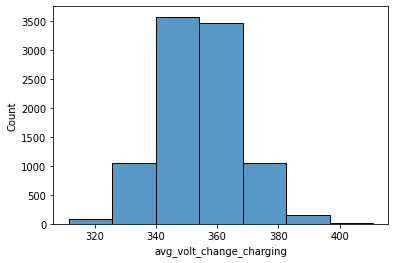

In [40]:
sns.histplot(data=failed_true, x='avg_volt_change_charging', bins = 7)

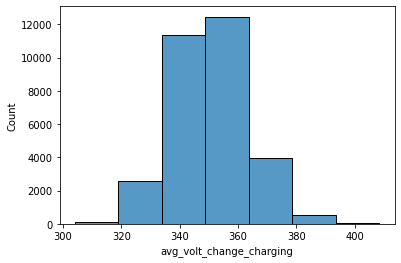

In [41]:
sns.histplot(data=failed_false, x='avg_volt_change_charging', bins = 7)